In [1]:
#Installing required packages

#!pip install WordNet
#!pip install torch
#!pip install spacy
#!pip install -U spacy 
#pip install transformers
#!python -m spacy download en_core_web_sm
#!pip install imblearn

#importing required libraries

import pandas as pd
import numpy as np 
import nltk
import re
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns



#  Preprocesssing textual data

from nltk import word_tokenize, pos_tag
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
pd.set_option('display.max_colwidth', 1000)

# additional nltk resources

nltk.download('stopwords')
nltk.download('lemmatizer')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

# Feature Extraction

from sklearn.feature_extraction.text import TfidfVectorizer


# Check Performance
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading lemmatizer: Package 'lemmatizer' not found
[nltk_data]     in index
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\U

In [2]:
youtube = pd.read_csv(r"C:\Users\sukan\ipba\Balenciaga_Youtube_Comments.csv")
twitter = pd.read_csv(r"C:\Users\sukan\ipba\Balenciaga_Twitter.csv")
reddit = pd.read_csv(r"C:\Users\sukan\ipba\Balenciaga_Reddit.csv")

In [3]:
youtube.head()

Comment Number  Reply Number  Like Count          Published At  \
0             1.0           NaN           0  2023-02-21T16:26:27Z   
1             2.0           NaN           0  2023-02-18T01:07:25Z   
2             3.0           NaN           0  2023-02-17T22:44:42Z   
3             4.0           NaN           0  2023-02-17T04:08:11Z   
4             5.0           NaN           0  2023-02-16T19:05:02Z   

                                                                                                                                                                                                                                                     Comments  \
0                                                                                                                                                                                                              thank you for making this and calling them out   
1  hi blaire im surprised when you said youre not spiritual and that you dont believe in god because youre a very enlightened soul who is aligned with the truth and thats rare in this world keep up the good work and thank you for supporting jk rowling 💖   
2                                               blaire you rock thank you for talking about this issue and for calling out celebrities and the left for being silent about it how on earth fighting pedophilia is a partisan issue it must be everybodys goal   
3                                                                                                                                                                                  kids are the one thing we should all agree with dont fuck with kids period   
4                                                                                                             i always say the most wretched of them all are very similar to the most priviledged of them all when it comes to their greed and lack of morals   

   text_length  
0           47  
1          258  
2          213  
3           75  
4          144

In [4]:
twitter.head()

id  \
0  1.620210e+18   
1  1.620210e+18   
2  1.620200e+18   
3  1.620150e+18   
4  1.620140e+18   

                                                                                                                                                                                                                                                                                    content  \
0  Latest Podcast is out now! - Balenciaga Is Run By Satanists | JUST THINK #5 https://t.co/AsIzLXynLn via @YouTube | #Balenciagapedos #Balenciaga #satan #satanist #SATANIC #pedophelia #podcastshow #podcast #podcastlife #PodcastAndChill #podcaster #podcasting #lucifer #luciferian #h   
1                                                                                                             Over 500 brands including #Gucci, #OffWhite, #Balenciaga, #MaisonMargiela, #MarineSerre, #SaintLaurent #fashion and many more https://t.co/gRmQa9ahMX https://t.co/7TMOC7LXRP   
2                                                                                     So good I had to share! Check out all the items I'm loving on @Poshmarkapp #poshmark #fashion #style #shopmycloset #balenciaga #variety #stevemadden: https://t.co/C6QmuJvQSc https://t.co/08QcAOwm2C   
3                                                                                                                          @SKKN NOTHING! We don't support pedos and those who support child abuse and exploitation. #balenciaga #cancelkimkardashian #cancelskims ðŸ’©ðŸ¤®ðŸ’©ðŸ¤®ðŸ’©ðŸ¤®   
4                                                                                       So good I had to share! Check out all the items I'm loving on @Poshmarkapp #poshmark #fashion #style #shopmycloset #madewell #balenciaga #kaileigh: https://t.co/H1v5xqQaEo https://t.co/r3oAOFBei4   

                        date  
0  2023-01-30 23:46:10+00:00  
1  2023-01-30 23:44:31+00:00  
2  2023-01-30 23:33:43+00:00  
3  2023-01-30 20:04:35+00:00  
4  2023-01-30 19:30:19+00:00

In [5]:
reddit.head()

Unnamed: 0 Comment ID   Parent ID             Author  \
0           0    j88ymqt  t3_110fvn8              A_cim   
1           1    j89ou87  t3_110fvn8    Former_Bite4274   
2           2    j88veb6  t3_110fvn8           perryske   
3           3    j8907u9  t3_110fvn8           YoBrisky   
4           4    j88w5ca  t3_110fvn8  jokingaround91477   

                                            Text  Score       Created  Likes  
0  nice budget haul...crazy finds for that price     28  1.676216e+09    NaN  
1                        Man is de budget manace     21  1.676226e+09    NaN  
2                              Lekkere haul man!      7  1.676214e+09    NaN  
3  Oh wait no way the shoes have been taken down      5  1.676216e+09    NaN  
4                        Nice definitely copping      4  1.676215e+09    NaN

In [6]:
twitter.shape

(29161, 3)

In [7]:
##Replace 'Text' column to 'Comments'

#youtube.rename(columns = {'Text':'Comments'}, inplace = True)
twitter.rename(columns = {'content':'Comments'}, inplace = True)
reddit.rename(columns = {'Text':'Comments'}, inplace = True)

In [8]:
### Create Length Feature

#youtube['text_length'] = youtube['Comments'].apply(lambda x : len(x))
twitter['text_length'] = twitter['Comments'].apply(lambda x : len(x))
reddit['text_length'] = reddit['Comments'].apply(lambda x : len(x))

In [9]:
youtube['Comments'] =youtube['Comments'].astype(str)
twitter['Comments'] =twitter['Comments'].astype(str)
reddit['Comments'] =reddit['Comments'].astype(str)

In [10]:
youtube.isnull().sum()

Comment Number     5264
Reply Number      21266
Like Count            0
Published At          0
Comments              0
text_length           0
dtype: int64

In [11]:
twitter.isnull().sum()

id             0
Comments       0
date           0
text_length    0
dtype: int64

In [12]:
reddit.isnull().sum()

Unnamed: 0         0
Comment ID         0
Parent ID          0
Author             0
Comments           0
Score              0
Created            0
Likes          35749
text_length        0
dtype: int64

In [13]:
youtube = youtube[['Comments', 'text_length']][:2000]
twitter = twitter[['Comments', 'text_length']][:2000]
reddit = reddit[['Comments', 'text_length']][:2000]

In [14]:
youtube.head()

Comments  \
0                                                                                                                                                                                                              thank you for making this and calling them out   
1  hi blaire im surprised when you said youre not spiritual and that you dont believe in god because youre a very enlightened soul who is aligned with the truth and thats rare in this world keep up the good work and thank you for supporting jk rowling 💖   
2                                               blaire you rock thank you for talking about this issue and for calling out celebrities and the left for being silent about it how on earth fighting pedophilia is a partisan issue it must be everybodys goal   
3                                                                                                                                                                                  kids are the one thing we should all agree with dont fuck with kids period   
4                                                                                                             i always say the most wretched of them all are very similar to the most priviledged of them all when it comes to their greed and lack of morals   

   text_length  
0           47  
1          258  
2          213  
3           75  
4          144

In [15]:
twitter.head()

Comments  \
0  Latest Podcast is out now! - Balenciaga Is Run By Satanists | JUST THINK #5 https://t.co/AsIzLXynLn via @YouTube | #Balenciagapedos #Balenciaga #satan #satanist #SATANIC #pedophelia #podcastshow #podcast #podcastlife #PodcastAndChill #podcaster #podcasting #lucifer #luciferian #h   
1                                                                                                             Over 500 brands including #Gucci, #OffWhite, #Balenciaga, #MaisonMargiela, #MarineSerre, #SaintLaurent #fashion and many more https://t.co/gRmQa9ahMX https://t.co/7TMOC7LXRP   
2                                                                                     So good I had to share! Check out all the items I'm loving on @Poshmarkapp #poshmark #fashion #style #shopmycloset #balenciaga #variety #stevemadden: https://t.co/C6QmuJvQSc https://t.co/08QcAOwm2C   
3                                                                                                                          @SKKN NOTHING! We don't support pedos and those who support child abuse and exploitation. #balenciaga #cancelkimkardashian #cancelskims ðŸ’©ðŸ¤®ðŸ’©ðŸ¤®ðŸ’©ðŸ¤®   
4                                                                                       So good I had to share! Check out all the items I'm loving on @Poshmarkapp #poshmark #fashion #style #shopmycloset #madewell #balenciaga #kaileigh: https://t.co/H1v5xqQaEo https://t.co/r3oAOFBei4   

   text_length  
0          280  
1          173  
2          197  
3          160  
4          195

In [16]:
reddit.head()

Comments  text_length
0  nice budget haul...crazy finds for that price           45
1                        Man is de budget manace           23
2                              Lekkere haul man!           17
3  Oh wait no way the shoes have been taken down           45
4                        Nice definitely copping           23

In [17]:
youtube.shape

(2000, 2)

In [18]:
twitter.shape

(2000, 2)

In [19]:
reddit.shape

(2000, 2)

<AxesSubplot:ylabel='Frequency'>

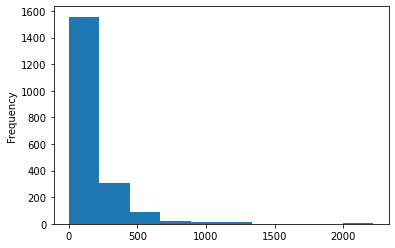

In [20]:
youtube.loc[:,'text_length'].plot.hist(bins = 10)

<AxesSubplot:ylabel='Frequency'>

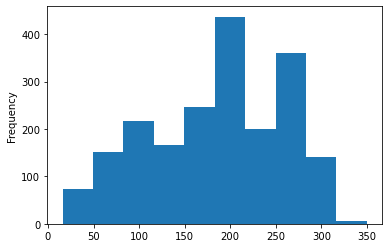

In [21]:
twitter.loc[:,'text_length'].plot.hist(bins = 10)

<AxesSubplot:ylabel='Frequency'>

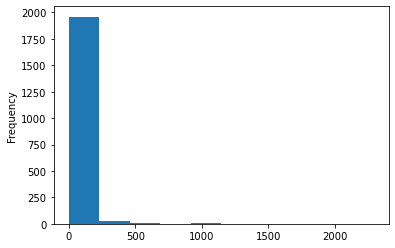

In [22]:
reddit.loc[:,'text_length'].plot.hist(bins = 10)

In [23]:
# URLs removal and extra spaces too

youtube['Comments'] = youtube['Comments'].apply(lambda x: re.sub(r'https?\S+ðŸ˜žðŸ˜­ðŸ¤¬', '', x).strip())
twitter['Comments'] = twitter['Comments'].apply(lambda x: re.sub(r'https?\S+ðŸ˜žðŸ˜­ðŸ¤¬', '', x).strip())
reddit['Comments'] = reddit['Comments'].apply(lambda x: re.sub(r'https?\S+ðŸ˜žðŸ˜­ðŸ¤¬', '', x).strip())

In [24]:
##Remove punctuation

import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [25]:
# Commit to Table
youtube['Comments'] = youtube['Comments'].apply(remove_punctuations)
twitter['Comments'] = twitter['Comments'].apply(remove_punctuations)
reddit['Comments'] = reddit['Comments'].apply(remove_punctuations)

In [26]:
# Convert to lower 
youtube['Comments']=youtube['Comments'].apply(lambda x: x.lower())
twitter['Comments']=twitter['Comments'].apply(lambda x: x.lower())
reddit['Comments']=reddit['Comments'].apply(lambda x: x.lower())

In [27]:
# Get Stopwords
stop = stopwords.words('english')

In [28]:
# Tokenize and Remove Stop Words
youtube['Comments'].apply(lambda x: [word for word in x.split() if word not in stop])
twitter['Comments'].apply(lambda x: [word for word in x.split() if word not in stop])
reddit['Comments'].apply(lambda x: [word for word in x.split() if word not in stop])

0       [nice, budget, haulcrazy, finds, price]
1                     [man, de, budget, manace]
2                          [lekkere, haul, man]
3                 [oh, wait, way, shoes, taken]
4                   [nice, definitely, copping]
                         ...                   
1995                                  [done😲‼️]
1996                                     [done]
1997                                     [done]
1998                                 [done, 🫶🏻]
1999                                     [done]
Name: Comments, Length: 2000, dtype: object

In [29]:
# Join the words back
youtube['Comments'] = youtube['Comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
twitter['Comments'] = twitter['Comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
reddit['Comments'] = reddit['Comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [30]:
##Remove non-ASCII improperly encoded characters

def remove_invalid_chars(text):
    # encode the text string using ASCII encoding
    encoded_text = text.encode('ascii', 'ignore')
    # decode the encoded text using ASCII encoding
    decoded_text = encoded_text.decode('ascii')
    return decoded_text

In [31]:
# apply the remove_invalid_chars function to the 'Comments' column
youtube['Comments'] = youtube['Comments'].apply(remove_invalid_chars)
twitter['Comments'] = twitter['Comments'].apply(remove_invalid_chars)
reddit['Comments'] = reddit['Comments'].apply(remove_invalid_chars)

In [32]:
import re

def clean_text(text):
    text = str(text)
    # Remove any URLs
    text = re.sub(r'http\S+', '', text)
    # Remove any user mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    # Remove any non-word character and extra whitespaces
    text = re.sub(r'[^\w\s]', '', text).strip()
    # Convert to lowercase
    text = text.lower()
    return text

youtube['cleaned_comments'] = youtube['Comments'].apply(clean_text)
twitter['cleaned_comments'] = twitter['Comments'].apply(clean_text)
reddit['cleaned_comments'] = reddit['Comments'].apply(clean_text)

In [33]:
from nltk.stem import WordNetLemmatizer


lemmatizer = WordNetLemmatizer()
# Commit to all the dataset
youtube['cleaned_comments'] = youtube['cleaned_comments'].apply(lambda x: lemmatizer.lemmatize(x))
twitter['cleaned_comments'] = twitter['cleaned_comments'].apply(lambda x: lemmatizer.lemmatize(x))
reddit['cleaned_comments'] = reddit['cleaned_comments'].apply(lambda x: lemmatizer.lemmatize(x))

In [34]:
# Instantiate the TweetTokenizer
tokenizer = TweetTokenizer()

# Define a function to tokenize a tweet
def tokenize_tweet(tweet):
    # Use the TweetTokenizer to tokenize the tweet
    tokens = tokenizer.tokenize(tweet)
    return tokens

# Apply the tokenization function to the 'Comments' column
youtube['Tokens'] = youtube['cleaned_comments'].apply(tokenize_tweet)
twitter['Tokens'] = twitter['cleaned_comments'].apply(tokenize_tweet)
reddit['Tokens'] = reddit['cleaned_comments'].apply(tokenize_tweet)

In [35]:
def pos_tagging(text):
    # Tokenize the text into words
    tokens = nltk.word_tokenize(text)
    # Perform POS tagging
    tagged_tokens = nltk.pos_tag(tokens)
    # Return the tagged tokens
    return tagged_tokens

In [36]:
# Applying the POS tagging function to the 'Comments' column
youtube['POS_Tagged'] = youtube['cleaned_comments'].apply(pos_tagging)
twitter['POS_Tagged'] = twitter['cleaned_comments'].apply(pos_tagging)
reddit['POS_Tagged'] = reddit['cleaned_comments'].apply(pos_tagging)

In [37]:
youtube.head()

Comments  \
0                                                                                                                                            thank making calling   
1  hi blaire im surprised said youre spiritual dont believe god youre enlightened soul aligned truth thats rare world keep good work thank supporting jk rowling    
2                                   blaire rock thank talking issue calling celebrities left silent earth fighting pedophilia partisan issue must everybodys goal   
3                                                                                                                      kids one thing agree dont fuck kids period   
4                                                                                                 always say wretched similar priviledged comes greed lack morals   

   text_length  \
0           47   
1          258   
2          213   
3           75   
4          144   

                                                                                                                                                cleaned_comments  \
0                                                                                                                                           thank making calling   
1  hi blaire im surprised said youre spiritual dont believe god youre enlightened soul aligned truth thats rare world keep good work thank supporting jk rowling   
2                                  blaire rock thank talking issue calling celebrities left silent earth fighting pedophilia partisan issue must everybodys goal   
3                                                                                                                     kids one thing agree dont fuck kids period   
4                                                                                                always say wretched similar priviledged comes greed lack morals   

                                                                                                                                                                                    Tokens  \
0                                                                                                                                                                 [thank, making, calling]   
1  [hi, blaire, im, surprised, said, youre, spiritual, dont, believe, god, youre, enlightened, soul, aligned, truth, thats, rare, world, keep, good, work, thank, supporting, jk, rowling]   
2                                          [blaire, rock, thank, talking, issue, calling, celebrities, left, silent, earth, fighting, pedophilia, partisan, issue, must, everybodys, goal]   
3                                                                                                                                      [kids, one, thing, agree, dont, fuck, kids, period]   
4                                                                                                                [always, say, wretched, similar, priviledged, comes, greed, lack, morals]   

                                                                                                                                                                                                                                                                                                                                              POS_Tagged  
0                                                                                                                                                                                                                                                                                                           [(thank, NN), (making, VBG), (calling, VBG)]  
1  [(hi, NN), (blaire, NN), (im, NN), (surprised, VBD), (said, VBD), (youre, NN), (spiritual, JJ), (dont, NN), (believe, VBP), (god, NN), (youre, NN), (enlightened, VBD), (soul, NN), (aligned, VBN), (truth, NN), (thats, NNS), (rare, 

In [38]:
twitter.head()

Comments  \
0  latest podcast balenciaga run satanists think 5 httpstcoasizlxynln via youtube balenciagapedos balenciaga satan satanist satanic pedophelia podcastshow podcast podcastlife podcastandchill podcaster podcasting lucifer luciferian h   
1                                                                                              500 brands including gucci offwhite balenciaga maisonmargiela marineserre saintlaurent fashion many httpstcogrmqa9ahmx httpstco7tmoc7lxrp   
2                                                                                  good share check items im loving poshmarkapp poshmark fashion style shopmycloset balenciaga variety stevemadden httpstcoc6qmujvqsc httpstco08qcaowm2c   
3                                                                                                                           skkn nothing dont support pedos support child abuse exploitation balenciaga cancelkimkardashian cancelskims    
4                                                                                    good share check items im loving poshmarkapp poshmark fashion style shopmycloset madewell balenciaga kaileigh httpstcoh1v5xqqaeo httpstcor3oaofbei4   

   text_length  \
0          280   
1          173   
2          197   
3          160   
4          195   

                                                                                                                                                                                                      cleaned_comments  \
0  latest podcast balenciaga run satanists think 5  via youtube balenciagapedos balenciaga satan satanist satanic pedophelia podcastshow podcast podcastlife podcastandchill podcaster podcasting lucifer luciferian h   
1                                                                                                                  500 brands including gucci offwhite balenciaga maisonmargiela marineserre saintlaurent fashion many   
2                                                                                                      good share check items im loving poshmarkapp poshmark fashion style shopmycloset balenciaga variety stevemadden   
3                                                                                                          skkn nothing dont support pedos support child abuse exploitation balenciaga cancelkimkardashian cancelskims   
4                                                                                                        good share check items im loving poshmarkapp poshmark fashion style shopmycloset madewell balenciaga kaileigh   

                                                                                                                                                                                                                                        Tokens  \
0  [latest, podcast, balenciaga, run, satanists, think, 5, via, youtube, balenciagapedos, balenciaga, satan, satanist, satanic, pedophelia, podcastshow, podcast, podcastlife, podcastandchill, podcaster, podcasting, lucifer, luciferian, h]   
1                                                                                                                              [500, brands, including, gucci, offwhite, balenciaga, maisonmargiela, marineserre, saintlaurent, fashion, many]   
2                                                                                                               [good, share, check, items, im, loving, poshmarkapp, poshmark, fashion, style, shopmycloset, balenciaga, variety, stevemadden]   
3                                                                                                                     [skkn, nothing, dont, support, pedos, support, child, abuse, exploitation, balenciaga, cancelkimkardashian, cancelskims]   
4                                                                                                                 [good, share, check, items, im, loving, poshmarkapp, poshmark, fa

In [39]:
reddit.head()

Comments  text_length  \
0  nice budget haulcrazy finds price           45   
1               man de budget manace           23   
2                   lekkere haul man           17   
3            oh wait way shoes taken           45   
4            nice definitely copping           23   

                    cleaned_comments                                   Tokens  \
0  nice budget haulcrazy finds price  [nice, budget, haulcrazy, finds, price]   
1               man de budget manace                [man, de, budget, manace]   
2                   lekkere haul man                     [lekkere, haul, man]   
3            oh wait way shoes taken            [oh, wait, way, shoes, taken]   
4            nice definitely copping              [nice, definitely, copping]   

                                                               POS_Tagged  
0  [(nice, JJ), (budget, NN), (haulcrazy, NN), (finds, VBZ), (price, NN)]  
1                      [(man, NN), (de, VBZ), (budget, NN), (manace, NN)]  
2                                  [(lekkere, RB), (haul, NN), (man, NN)]  
3           [(oh, UH), (wait, JJ), (way, NN), (shoes, NNS), (taken, VBN)]  
4                          [(nice, JJ), (definitely, RB), (copping, VBG)]

In [40]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Instantiate new SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Generate sentiment scores for each dataset
youtube_scores = youtube['cleaned_comments'].apply(sid.polarity_scores)
twitter_scores = twitter['cleaned_comments'].apply(sid.polarity_scores)
reddit_scores = reddit['cleaned_comments'].apply(sid.polarity_scores)

# Add a column with the VADER compound score for each dataset
youtube["vader_score"] = youtube_scores.apply(lambda x: x['compound'])
twitter["vader_score"] = twitter_scores.apply(lambda x: x['compound'])
reddit["vader_score"] = reddit_scores.apply(lambda x: x['compound'])

# Define conditions and choices for each dataset
youtube_conditions = [(youtube['vader_score'] >= 0), (youtube['vader_score'] < 0)]
twitter_conditions = [(twitter['vader_score'] >= 0), (twitter['vader_score'] < 0)]
reddit_conditions = [(reddit['vader_score'] >= 0), (reddit['vader_score'] < 0)]

youtube_choices = [1, 0]
twitter_choices = [1, 0]
reddit_choices = [1, 0]

# Add a column with the VADER sentiment label for each dataset
youtube['vader_label'] = np.select(youtube_conditions, youtube_choices)
twitter['vader_label'] = np.select(twitter_conditions, twitter_choices)
reddit['vader_label'] = np.select(reddit_conditions, reddit_choices)

# Count the number of positive and negative tweets for each dataset
youtube_pos = youtube['vader_label'].value_counts()[1]
youtube_neg = youtube['vader_label'].value_counts()[0]
twitter_pos = twitter['vader_label'].value_counts()[1]
twitter_neg = twitter['vader_label'].value_counts()[0]
reddit_pos = reddit['vader_label'].value_counts()[1]
reddit_neg = reddit['vader_label'].value_counts()[0]

# Print the results for each dataset
print("YouTube Positive Tweets:", youtube_pos)
print("YouTube Negative Tweets:", youtube_neg)
print("Twitter Positive Tweets:", twitter_pos)
print("Twitter Negative Tweets:", twitter_neg)
print("Reddit Positive Tweets:", reddit_pos)
print("Reddit Negative Tweets:", reddit_neg)

YouTube Positive Tweets: 1240
YouTube Negative Tweets: 760
Twitter Positive Tweets: 1288
Twitter Negative Tweets: 712
Reddit Positive Tweets: 1833
Reddit Negative Tweets: 167


In [41]:
def add_sentiment_label(score):
    if score >= 0:
        return 'positive'
    else:
        return 'negative'

# Add sentiment labels to the dataframes
youtube['vader_label'] = youtube['vader_score'].apply(add_sentiment_label)
twitter['vader_label'] = twitter['vader_score'].apply(add_sentiment_label)
reddit['vader_label'] = reddit['vader_score'].apply(add_sentiment_label)

<AxesSubplot:xlabel='vader_label', ylabel='count'>

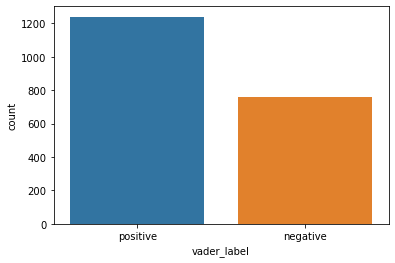

In [42]:
#Barchart of sentiment distribution
sns.countplot(x='vader_label', data=youtube)

<AxesSubplot:xlabel='vader_label', ylabel='count'>

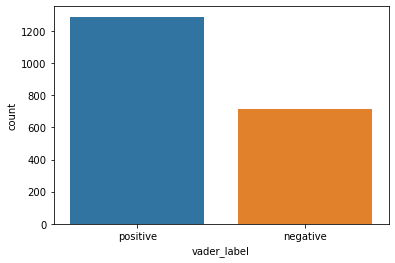

In [43]:
#Barchart of sentiment distribution
sns.countplot(x='vader_label', data=twitter)

<AxesSubplot:xlabel='vader_label', ylabel='count'>

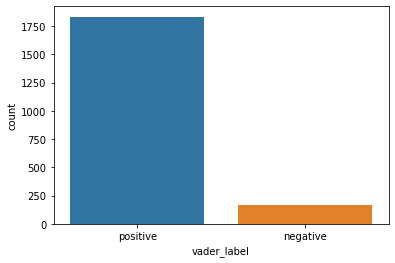

In [44]:
#Barchart of sentiment distribution
sns.countplot(x='vader_label', data=reddit)

Positive Sentiments


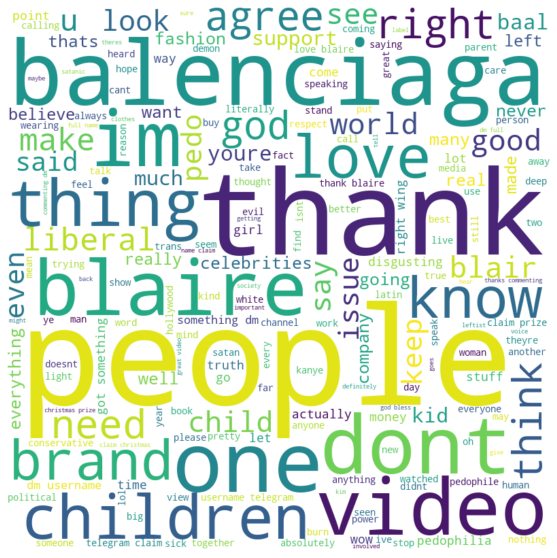

Negative Sentiments


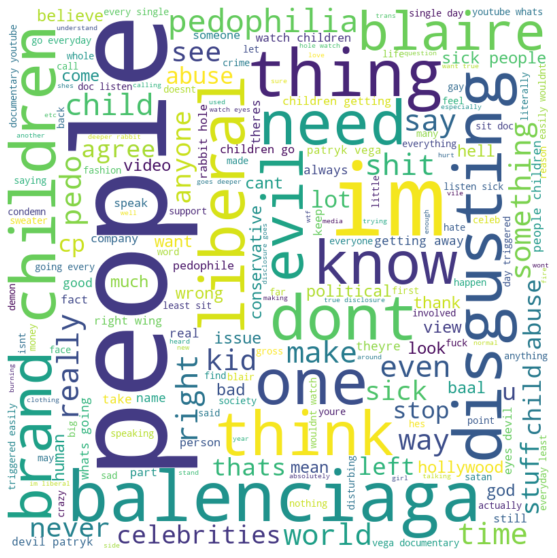

In [45]:
#Youtube
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

positive_tweets = ' '.join(youtube[youtube['vader_label'] == 'positive']['cleaned_comments'].tolist())

negative_tweets = ' '.join(youtube[youtube['vader_label'] == 'negative']['cleaned_comments'].tolist())

print("Positive Sentiments")
generate_wordcloud(positive_tweets)
print("Negative Sentiments")
generate_wordcloud(negative_tweets)

Positive Sentiments


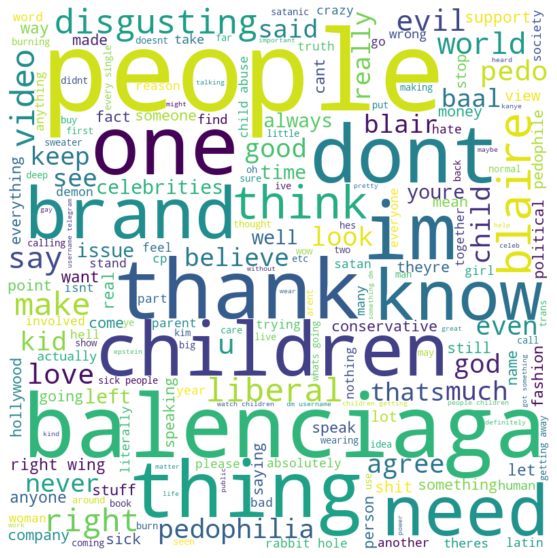

Negative Sentiments


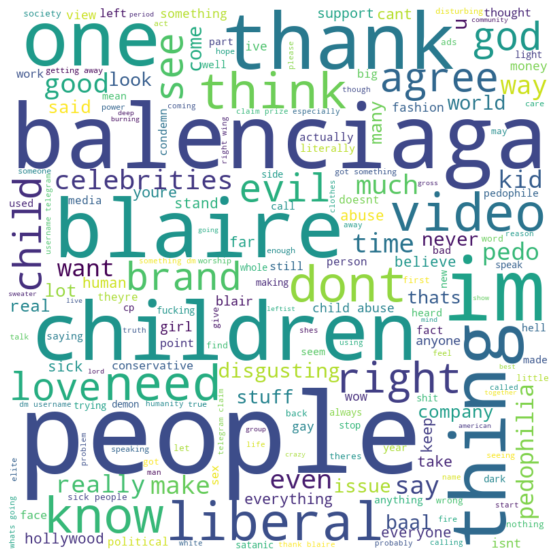

In [46]:
#Twitter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

positive_tweets = ' '.join(youtube[twitter['vader_label'] == 'positive']['cleaned_comments'].tolist())

negative_tweets = ' '.join(youtube[twitter['vader_label'] == 'negative']['cleaned_comments'].tolist())

print("Positive Sentiments")
generate_wordcloud(positive_tweets)
print("Negative Sentiments")
generate_wordcloud(negative_tweets)


Positive Sentiments


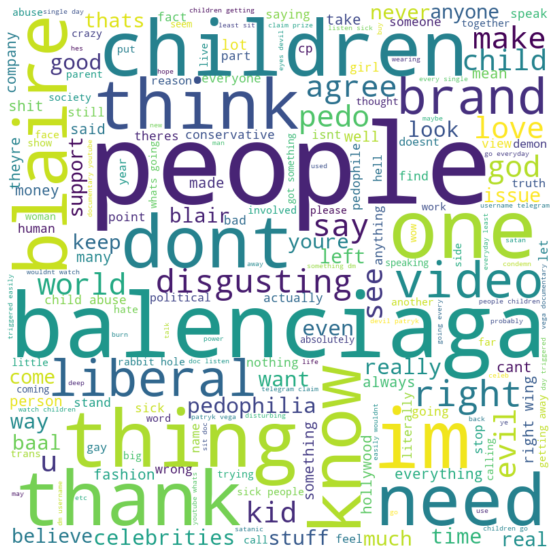

Negative Sentiments


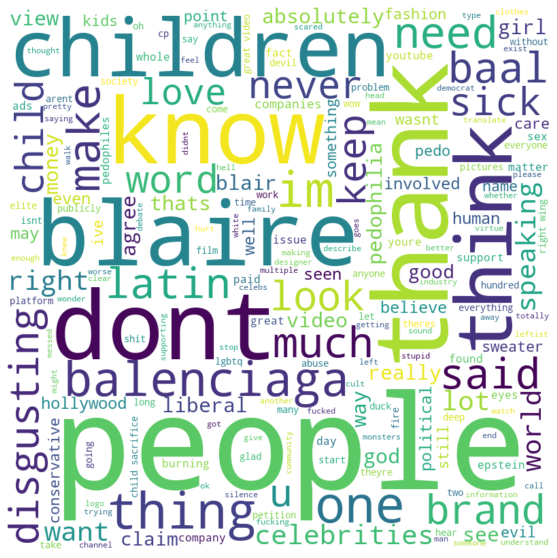

In [47]:
#Reddit
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

positive_tweets = ' '.join(youtube[reddit['vader_label'] == 'positive']['cleaned_comments'].tolist())

negative_tweets = ' '.join(youtube[reddit['vader_label'] == 'negative']['cleaned_comments'].tolist())

print("Positive Sentiments")
generate_wordcloud(positive_tweets)
print("Negative Sentiments")
generate_wordcloud(negative_tweets)

In [48]:
###transformer

In [49]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [50]:
import spacy
import pandas as pd

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('sentencizer')

#Export sample comments from all the datasets
text = youtube['cleaned_comments'].tolist()[:100]
text1 = twitter['cleaned_comments'].tolist()[:100]
text2 = reddit['cleaned_comments'].tolist()[:100]

sentences = []
for doc in nlp.pipe(text):
    sentences.extend([sent.text for sent in doc.sents])

print(sentences)

['thank making calling', 'hi blaire im surprised said youre spiritual dont believe god youre enlightened soul aligned truth thats rare world keep good work thank supporting jk rowling', 'blaire rock thank talking issue calling celebrities left silent earth fighting pedophilia partisan issue must everybodys goal', 'kids one thing agree dont fuck kids period', 'always say wretched similar priviledged comes greed lack morals', 'ive lot research its staggering whats shoadows powerful corrupt things starting make since especially tie bombshell epstine story deep goes im finding many links occult demonic specificity worship baal represented bull moloch represented owl god child sacrifice open eyes realize evil control happened said quiet part loud find say quite part loud', 'dont u think people going create brands thing', 'im pretty sure one normal left right lib seditionist name want pedophilia heck woman last thing portugal clergy theme', 'thank content blaire', 'give clothes charity inste

In [51]:
#Let's test the sentiments on the cleaned text
sent_pipeline(youtube['cleaned_comments'].tolist()[:100])
sent_pipeline(twitter['cleaned_comments'].tolist()[:100])
sent_pipeline(reddit['cleaned_comments'].tolist()[:100])

[{'label': 'POSITIVE', 'score': 0.999221920967102},
 {'label': 'NEGATIVE', 'score': 0.9174119830131531},
 {'label': 'NEGATIVE', 'score': 0.9931354522705078},
 {'label': 'NEGATIVE', 'score': 0.9905067086219788},
 {'label': 'POSITIVE', 'score': 0.9998051524162292},
 {'label': 'POSITIVE', 'score': 0.8276969194412231},
 {'label': 'POSITIVE', 'score': 0.8273237943649292},
 {'label': 'NEGATIVE', 'score': 0.8797109723091125},
 {'label': 'POSITIVE', 'score': 0.9167222380638123},
 {'label': 'NEGATIVE', 'score': 0.9207513332366943},
 {'label': 'POSITIVE', 'score': 0.9861241579055786},
 {'label': 'NEGATIVE', 'score': 0.9998125433921814},
 {'label': 'NEGATIVE', 'score': 0.995502769947052},
 {'label': 'NEGATIVE', 'score': 0.6335565447807312},
 {'label': 'POSITIVE', 'score': 0.9858796000480652},
 {'label': 'POSITIVE', 'score': 0.9998613595962524},
 {'label': 'NEGATIVE', 'score': 0.9906875491142273},
 {'label': 'POSITIVE', 'score': 0.9730662703514099},
 {'label': 'POSITIVE', 'score': 0.97057050466537

In [52]:
#Join the labels in the datasets
sentiments = sent_pipeline(youtube['cleaned_comments'].tolist())
sentiments1 = sent_pipeline(reddit['cleaned_comments'].tolist())
sentiments2 = sent_pipeline(reddit['cleaned_comments'].tolist())

youtube['transformer_score'] = [s['score'] for s in sentiments]
youtube['transformer_label'] = [s['label'] for s in sentiments]

twitter['transformer_score'] = [s['score'] for s in sentiments1]
twitter['transformer_label'] = [s['label'] for s in sentiments1]

reddit['transformer_score'] = [s['score'] for s in sentiments2]
reddit['transformer_label'] = [s['label'] for s in sentiments2]

In [53]:
#Converts upper case to normal
youtube['transformer_label']=youtube['transformer_label'].str.title()
twitter['transformer_label']=twitter['transformer_label'].str.title()
reddit['transformer_label']=reddit['transformer_label'].str.title()

In [54]:
youtube.head()

Comments  \
0                                                                                                                                            thank making calling   
1  hi blaire im surprised said youre spiritual dont believe god youre enlightened soul aligned truth thats rare world keep good work thank supporting jk rowling    
2                                   blaire rock thank talking issue calling celebrities left silent earth fighting pedophilia partisan issue must everybodys goal   
3                                                                                                                      kids one thing agree dont fuck kids period   
4                                                                                                 always say wretched similar priviledged comes greed lack morals   

   text_length  \
0           47   
1          258   
2          213   
3           75   
4          144   

                                                                                                                                                cleaned_comments  \
0                                                                                                                                           thank making calling   
1  hi blaire im surprised said youre spiritual dont believe god youre enlightened soul aligned truth thats rare world keep good work thank supporting jk rowling   
2                                  blaire rock thank talking issue calling celebrities left silent earth fighting pedophilia partisan issue must everybodys goal   
3                                                                                                                     kids one thing agree dont fuck kids period   
4                                                                                                always say wretched similar priviledged comes greed lack morals   

                                                                                                                                                                                    Tokens  \
0                                                                                                                                                                 [thank, making, calling]   
1  [hi, blaire, im, surprised, said, youre, spiritual, dont, believe, god, youre, enlightened, soul, aligned, truth, thats, rare, world, keep, good, work, thank, supporting, jk, rowling]   
2                                          [blaire, rock, thank, talking, issue, calling, celebrities, left, silent, earth, fighting, pedophilia, partisan, issue, must, everybodys, goal]   
3                                                                                                                                      [kids, one, thing, agree, dont, fuck, kids, period]   
4                                                                                                                [always, say, wretched, similar, priviledged, comes, greed, lack, morals]   

                                                                                                                                                                                                                                                                                                                                              POS_Tagged  \
0                                                                                                                                                                                                                                                                                                           [(thank, NN), (making, VBG), (calling, VBG)]   
1  [(hi, NN), (blaire, NN), (im, NN), (surprised, VBD), (said, VBD), (youre, NN), (spiritual, JJ), (dont, NN), (believe, VBP), (god, NN), (youre, NN), (enlightened, VBD), (soul, NN), (aligned, VBN), (truth, NN), (thats, NNS), (rare

In [55]:
twitter.head()

Comments  \
0  latest podcast balenciaga run satanists think 5 httpstcoasizlxynln via youtube balenciagapedos balenciaga satan satanist satanic pedophelia podcastshow podcast podcastlife podcastandchill podcaster podcasting lucifer luciferian h   
1                                                                                              500 brands including gucci offwhite balenciaga maisonmargiela marineserre saintlaurent fashion many httpstcogrmqa9ahmx httpstco7tmoc7lxrp   
2                                                                                  good share check items im loving poshmarkapp poshmark fashion style shopmycloset balenciaga variety stevemadden httpstcoc6qmujvqsc httpstco08qcaowm2c   
3                                                                                                                           skkn nothing dont support pedos support child abuse exploitation balenciaga cancelkimkardashian cancelskims    
4                                                                                    good share check items im loving poshmarkapp poshmark fashion style shopmycloset madewell balenciaga kaileigh httpstcoh1v5xqqaeo httpstcor3oaofbei4   

   text_length  \
0          280   
1          173   
2          197   
3          160   
4          195   

                                                                                                                                                                                                      cleaned_comments  \
0  latest podcast balenciaga run satanists think 5  via youtube balenciagapedos balenciaga satan satanist satanic pedophelia podcastshow podcast podcastlife podcastandchill podcaster podcasting lucifer luciferian h   
1                                                                                                                  500 brands including gucci offwhite balenciaga maisonmargiela marineserre saintlaurent fashion many   
2                                                                                                      good share check items im loving poshmarkapp poshmark fashion style shopmycloset balenciaga variety stevemadden   
3                                                                                                          skkn nothing dont support pedos support child abuse exploitation balenciaga cancelkimkardashian cancelskims   
4                                                                                                        good share check items im loving poshmarkapp poshmark fashion style shopmycloset madewell balenciaga kaileigh   

                                                                                                                                                                                                                                        Tokens  \
0  [latest, podcast, balenciaga, run, satanists, think, 5, via, youtube, balenciagapedos, balenciaga, satan, satanist, satanic, pedophelia, podcastshow, podcast, podcastlife, podcastandchill, podcaster, podcasting, lucifer, luciferian, h]   
1                                                                                                                              [500, brands, including, gucci, offwhite, balenciaga, maisonmargiela, marineserre, saintlaurent, fashion, many]   
2                                                                                                               [good, share, check, items, im, loving, poshmarkapp, poshmark, fashion, style, shopmycloset, balenciaga, variety, stevemadden]   
3                                                                                                                     [skkn, nothing, dont, support, pedos, support, child, abuse, exploitation, balenciaga, cancelkimkardashian, cancelskims]   
4                                                                                                                 [good, share, check, items, im, loving, poshmarkapp, poshmark, fa

In [56]:
reddit.head()

Comments  text_length  \
0  nice budget haulcrazy finds price           45   
1               man de budget manace           23   
2                   lekkere haul man           17   
3            oh wait way shoes taken           45   
4            nice definitely copping           23   

                    cleaned_comments                                   Tokens  \
0  nice budget haulcrazy finds price  [nice, budget, haulcrazy, finds, price]   
1               man de budget manace                [man, de, budget, manace]   
2                   lekkere haul man                     [lekkere, haul, man]   
3            oh wait way shoes taken            [oh, wait, way, shoes, taken]   
4            nice definitely copping              [nice, definitely, copping]   

                                                               POS_Tagged  \
0  [(nice, JJ), (budget, NN), (haulcrazy, NN), (finds, VBZ), (price, NN)]   
1                      [(man, NN), (de, VBZ), (budget, NN), (manace, NN)]   
2                                  [(lekkere, RB), (haul, NN), (man, NN)]   
3           [(oh, UH), (wait, JJ), (way, NN), (shoes, NNS), (taken, VBN)]   
4                          [(nice, JJ), (definitely, RB), (copping, VBG)]   

   vader_score vader_label  transformer_score transformer_label  
0       0.4215    positive           0.999222          Positive  
1       0.0000    positive           0.917412          Negative  
2       0.0000    positive           0.993135          Negative  
3       0.0000    positive           0.990507          Negative  
4       0.6705    positive           0.999805          Positive

<AxesSubplot:xlabel='transformer_label', ylabel='count'>

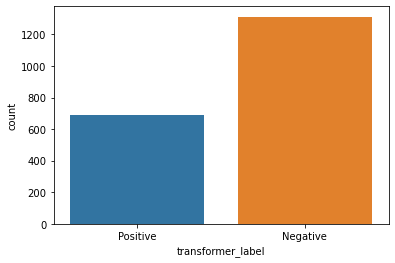

In [57]:
#Distribution of transformer sentiments
sns.countplot(x='transformer_label', data=youtube)

<AxesSubplot:xlabel='transformer_label', ylabel='count'>

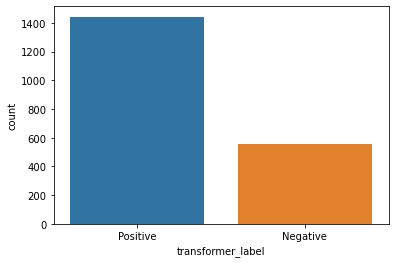

In [58]:
#Distribution of transformer sentiments
sns.countplot(x='transformer_label', data=twitter)

<AxesSubplot:xlabel='transformer_label', ylabel='count'>

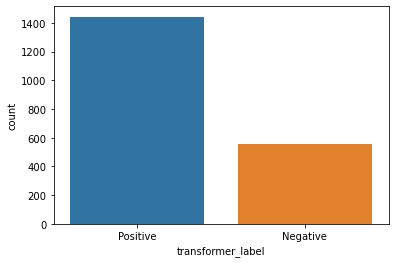

In [59]:
#Distribution of transformer sentiments
sns.countplot(x='transformer_label', data=reddit)

Positive Sentiments


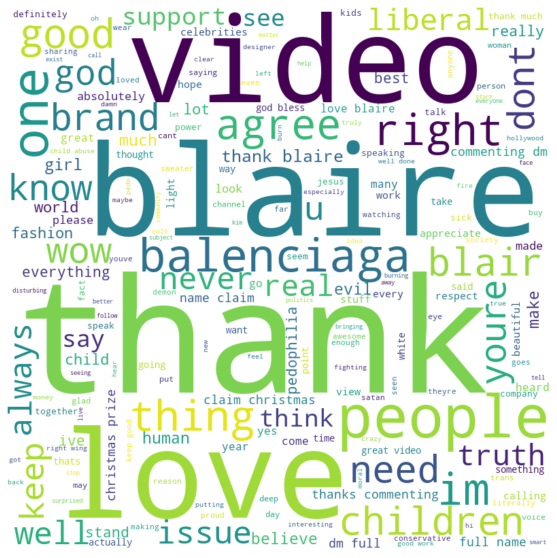

Negative Sentiments


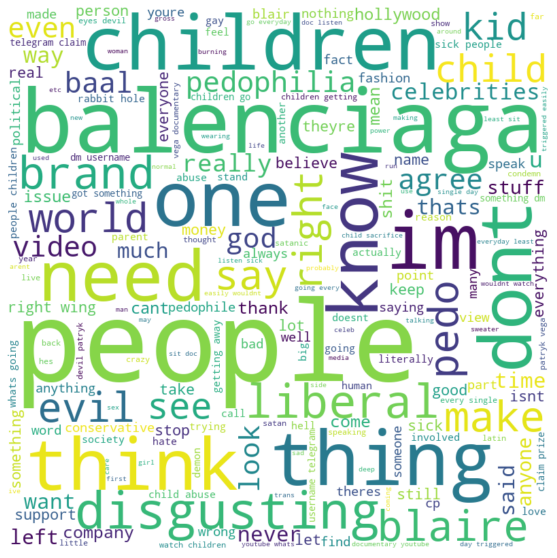

In [60]:
#Youtube
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

positive_tweets = ' '.join(youtube[youtube['transformer_label'] == 'Positive']['cleaned_comments'].tolist())

negative_tweets = ' '.join(youtube[youtube['transformer_label'] == 'Negative']['cleaned_comments'].tolist())

print("Positive Sentiments")
generate_wordcloud(positive_tweets)

print("Negative Sentiments")
generate_wordcloud(negative_tweets)

Positive Sentiments


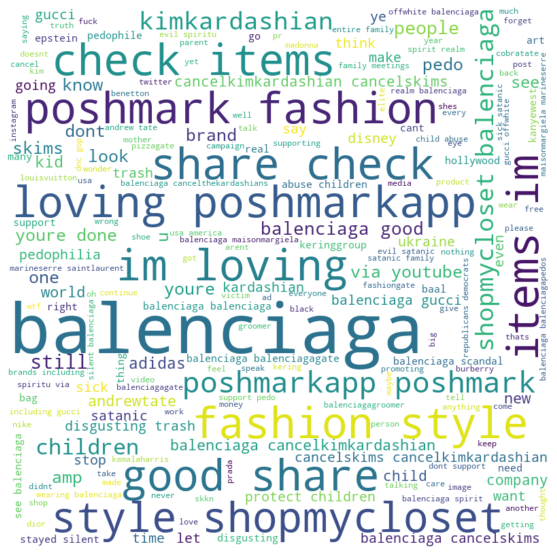

Negative Sentiments


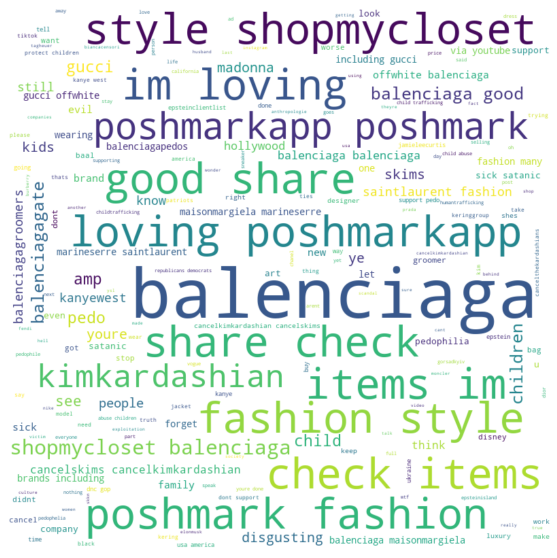

In [61]:
#Twitter
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

positive_tweets = ' '.join(twitter[twitter['transformer_label'] == 'Positive']['cleaned_comments'].tolist())

negative_tweets = ' '.join(twitter[twitter['transformer_label'] == 'Negative']['cleaned_comments'].tolist())

print("Positive Sentiments")
generate_wordcloud(positive_tweets)

print("Negative Sentiments")
generate_wordcloud(negative_tweets)

Positive Sentiments


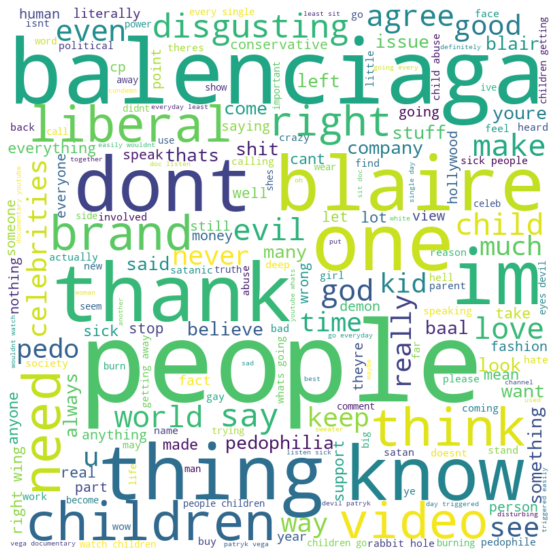

Negative Sentiments


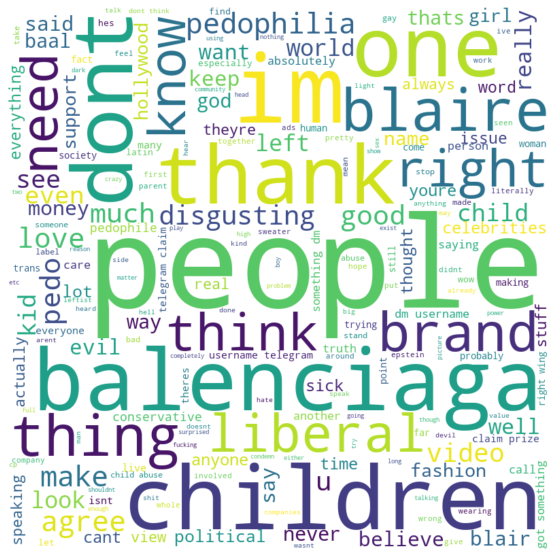

In [62]:
#Reddit
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

positive_tweets = ' '.join(youtube[reddit['transformer_label'] == 'Positive']['cleaned_comments'].tolist())

negative_tweets = ' '.join(youtube[reddit['transformer_label'] == 'Negative']['cleaned_comments'].tolist())

print("Positive Sentiments")
generate_wordcloud(positive_tweets)

print("Negative Sentiments")
generate_wordcloud(negative_tweets)

In [63]:
## Importing model
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [64]:
#Youtube
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Initialize the tokenizer and model
model_name = "textattack/roberta-base-SST-2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# List of samples
samples1 = youtube['cleaned_comments'].tolist()

# List to store the scores for each sample
scores_list = []

# Calculate the scores for each sample and store in the scores_list
for sample in samples1:
    encoded_text = tokenizer(sample, padding=True, truncation=True, max_length=128, return_tensors='pt')
    input_ids = encoded_text['input_ids']
    attention_mask = encoded_text['attention_mask']
    output = model(input_ids=input_ids, attention_mask=attention_mask)
    scores = torch.softmax(output.logits, dim=1)
    scores_dict = {
        'roberta_neg' : scores[0][0].item(),  
        'roberta_pos' : scores[0][1].item()
    }
    scores_list.append(scores_dict)

# Create a pandas dataframe from the scores_list
scores_df = pd.DataFrame(scores_list)

# Concatenate the original data and scores_df dataframes horizontally
youtube = pd.concat([youtube, scores_df], axis=1)

# Print the updated dataframe
print(youtube)

Some weights of the model checkpoint at textattack/roberta-base-SST-2 were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


                                                                                                                                                                                                                                                          Comments  \
0                                                                                                                                                                                                                                             thank making calling   
1                                                                                                   hi blaire im surprised said youre spiritual dont believe god youre enlightened soul aligned truth thats rare world keep good work thank supporting jk rowling    
2                                                                                                                                    blaire rock thank talking issue calling celebrities left silent earth fighting pe

In [65]:
#Twitter
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Initialize the tokenizer and model
model_name = "textattack/roberta-base-SST-2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# List of samples
samples2 = twitter['cleaned_comments'].tolist()

# List to store the scores for each sample
scores_list = []

# Calculate the scores for each sample and store in the scores_list
for sample in samples2:
    encoded_text = tokenizer(sample, padding=True, truncation=True, max_length=128, return_tensors='pt')
    input_ids = encoded_text['input_ids']
    attention_mask = encoded_text['attention_mask']
    output = model(input_ids=input_ids, attention_mask=attention_mask)
    scores = torch.softmax(output.logits, dim=1)
    scores_dict = {
        'roberta_neg' : scores[0][0].item(),  
        'roberta_pos' : scores[0][1].item()
    }
    scores_list.append(scores_dict)

# Create a pandas dataframe from the scores_list
scores_df1 = pd.DataFrame(scores_list)

# Concatenate the original data and scores_df dataframes horizontally
twitter = pd.concat([twitter, scores_df1], axis=1)

# Print the updated dataframe
print(twitter)

Some weights of the model checkpoint at textattack/roberta-base-SST-2 were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


                                                                                                                                                                                                                                                                         Comments  \
0                                           latest podcast balenciaga run satanists think 5 httpstcoasizlxynln via youtube balenciagapedos balenciaga satan satanist satanic pedophelia podcastshow podcast podcastlife podcastandchill podcaster podcasting lucifer luciferian h   
1                                                                                                                                       500 brands including gucci offwhite balenciaga maisonmargiela marineserre saintlaurent fashion many httpstcogrmqa9ahmx httpstco7tmoc7lxrp   
2                                                                                                                           good share check items im loving poshmarkapp 

In [66]:
#Reddit
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Initialize the tokenizer and model
model_name = "textattack/roberta-base-SST-2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# List of samples
samples3 = reddit['cleaned_comments'].tolist()

# List to store the scores for each sample
scores_list = []

# Calculate the scores for each sample and store in the scores_list
for sample in samples3:
    encoded_text = tokenizer(sample, padding=True, truncation=True, max_length=128, return_tensors='pt')
    input_ids = encoded_text['input_ids']
    attention_mask = encoded_text['attention_mask']
    output = model(input_ids=input_ids, attention_mask=attention_mask)
    scores = torch.softmax(output.logits, dim=1)
    scores_dict = {
        'roberta_neg' : scores[0][0].item(),  
        'roberta_pos' : scores[0][1].item()
    }
    scores_list.append(scores_dict)

# Create a pandas dataframe from the scores_list
scores_df2 = pd.DataFrame(scores_list)

# Concatenate the original data and scores_df dataframes horizontally
reddit = pd.concat([reddit, scores_df2], axis=1)

# Print the updated dataframe
print(reddit.head())

Some weights of the model checkpoint at textattack/roberta-base-SST-2 were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


                            Comments  text_length  \
0  nice budget haulcrazy finds price           45   
1               man de budget manace           23   
2                   lekkere haul man           17   
3            oh wait way shoes taken           45   
4            nice definitely copping           23   

                    cleaned_comments                                   Tokens  \
0  nice budget haulcrazy finds price  [nice, budget, haulcrazy, finds, price]   
1               man de budget manace                [man, de, budget, manace]   
2                   lekkere haul man                     [lekkere, haul, man]   
3            oh wait way shoes taken            [oh, wait, way, shoes, taken]   
4            nice definitely copping              [nice, definitely, copping]   

                                                               POS_Tagged  \
0  [(nice, JJ), (budget, NN), (haulcrazy, NN), (finds, VBZ), (price, NN)]   
1                      [(man, NN), (de, 

In [67]:
###bert

In [68]:
#Youtube
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Initialize the tokenizer and model
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
# List of samples
samples4 = youtube['cleaned_comments'].tolist()

# List to store the scores for each sample
scores_list = []

# Calculate the scores for each sample and store in the scores_list
for sample in samples4:
    encoded_text = tokenizer(sample, padding=True, truncation=True, max_length=128, return_tensors='pt')
    input_ids = encoded_text['input_ids']
    attention_mask = encoded_text['attention_mask']
    output = model(input_ids=input_ids, attention_mask=attention_mask)
    scores = torch.softmax(output.logits, dim=1)
    scores_dict = {
        'bert_neg' : scores[0][0].item(),  
        'bert_pos' : scores[0][1].item()
    }
    scores_list.append(scores_dict)

# Create a pandas dataframe from the scores_list
scores_df4 = pd.DataFrame(scores_list)

# Concatenate the original data and scores_df dataframes horizontally
youtube = pd.concat([youtube, scores_df4], axis=1)

# Print the updated dataframe
print(youtube.head())

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

                                                                                                                                                         Comments  \
0                                                                                                                                            thank making calling   
1  hi blaire im surprised said youre spiritual dont believe god youre enlightened soul aligned truth thats rare world keep good work thank supporting jk rowling    
2                                   blaire rock thank talking issue calling celebrities left silent earth fighting pedophilia partisan issue must everybodys goal   
3                                                                                                                      kids one thing agree dont fuck kids period   
4                                                                                                 always say wretched similar priviledged comes greed lack morals   

   text_l

In [69]:
#Twitter
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Initialize the tokenizer and model
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# List of samples
samples5 = twitter['cleaned_comments'].tolist()

# List to store the scores for each sample
scores_list = []

# Calculate the scores for each sample and store in the scores_list
for sample in samples5:
    encoded_text = tokenizer(sample, padding=True, truncation=True, max_length=128, return_tensors='pt')
    input_ids = encoded_text['input_ids']
    attention_mask = encoded_text['attention_mask']
    output = model(input_ids=input_ids, attention_mask=attention_mask)
    scores = torch.softmax(output.logits, dim=1)
    scores_dict = {
        'bert_neg' : scores[0][0].item(),  
        'bert_pos' : scores[0][1].item()
    }
    scores_list.append(scores_dict)

# Create a pandas dataframe from the scores_list
scores_df5 = pd.DataFrame(scores_list)

# Concatenate the original data and scores_df dataframes horizontally
twitter = pd.concat([twitter, scores_df5], axis=1)

# Print the updated dataframe
print(twitter.head())

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

                                                                                                                                                                                                                                Comments  \
0  latest podcast balenciaga run satanists think 5 httpstcoasizlxynln via youtube balenciagapedos balenciaga satan satanist satanic pedophelia podcastshow podcast podcastlife podcastandchill podcaster podcasting lucifer luciferian h   
1                                                                                              500 brands including gucci offwhite balenciaga maisonmargiela marineserre saintlaurent fashion many httpstcogrmqa9ahmx httpstco7tmoc7lxrp   
2                                                                                  good share check items im loving poshmarkapp poshmark fashion style shopmycloset balenciaga variety stevemadden httpstcoc6qmujvqsc httpstco08qcaowm2c   
3                                                       

In [70]:
#Reddit
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Initialize the tokenizer and model
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# List of samples
samples6 = reddit['cleaned_comments'].tolist()

# List to store the scores for each sample
scores_list = []

# Calculate the scores for each sample and store in the scores_list
for sample in samples6:
    encoded_text = tokenizer(sample, padding=True, truncation=True, max_length=128, return_tensors='pt')
    input_ids = encoded_text['input_ids']
    attention_mask = encoded_text['attention_mask']
    output = model(input_ids=input_ids, attention_mask=attention_mask)
    scores = torch.softmax(output.logits, dim=1)
    scores_dict = {
        'bert_neg' : scores[0][0].item(),  
        'bert_pos' : scores[0][1].item()
    }
    scores_list.append(scores_dict)

# Create a pandas dataframe from the scores_list
scores_df6 = pd.DataFrame(scores_list)

# Concatenate the original data and scores_df dataframes horizontally
reddit = pd.concat([reddit, scores_df6], axis=1)

# Print the updated dataframe
print(reddit.head())

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

                            Comments  text_length  \
0  nice budget haulcrazy finds price           45   
1               man de budget manace           23   
2                   lekkere haul man           17   
3            oh wait way shoes taken           45   
4            nice definitely copping           23   

                    cleaned_comments                                   Tokens  \
0  nice budget haulcrazy finds price  [nice, budget, haulcrazy, finds, price]   
1               man de budget manace                [man, de, budget, manace]   
2                   lekkere haul man                     [lekkere, haul, man]   
3            oh wait way shoes taken            [oh, wait, way, shoes, taken]   
4            nice definitely copping              [nice, definitely, copping]   

                                                               POS_Tagged  \
0  [(nice, JJ), (budget, NN), (haulcrazy, NN), (finds, VBZ), (price, NN)]   
1                      [(man, NN), (de, 

In [71]:
def get_label(score):
    if score > 0.5:
        return "Positive"
    else:
        return "Negative"

# Convert the scores to labels for each model
youtube["bert_label"] = youtube["bert_pos"].apply(get_label)
youtube["roberta_label"] = youtube["roberta_pos"].apply(get_label)

twitter["bert_label"] = twitter["bert_pos"].apply(get_label)
twitter["roberta_label"] = twitter["roberta_pos"].apply(get_label)

reddit["bert_label"] = reddit["bert_pos"].apply(get_label)
reddit["roberta_label"] = reddit["roberta_pos"].apply(get_label)


In [72]:
youtube.head()

Comments  \
0                                                                                                                                            thank making calling   
1  hi blaire im surprised said youre spiritual dont believe god youre enlightened soul aligned truth thats rare world keep good work thank supporting jk rowling    
2                                   blaire rock thank talking issue calling celebrities left silent earth fighting pedophilia partisan issue must everybodys goal   
3                                                                                                                      kids one thing agree dont fuck kids period   
4                                                                                                 always say wretched similar priviledged comes greed lack morals   

   text_length  \
0           47   
1          258   
2          213   
3           75   
4          144   

                                                                                                                                                cleaned_comments  \
0                                                                                                                                           thank making calling   
1  hi blaire im surprised said youre spiritual dont believe god youre enlightened soul aligned truth thats rare world keep good work thank supporting jk rowling   
2                                  blaire rock thank talking issue calling celebrities left silent earth fighting pedophilia partisan issue must everybodys goal   
3                                                                                                                     kids one thing agree dont fuck kids period   
4                                                                                                always say wretched similar priviledged comes greed lack morals   

                                                                                                                                                                                    Tokens  \
0                                                                                                                                                                 [thank, making, calling]   
1  [hi, blaire, im, surprised, said, youre, spiritual, dont, believe, god, youre, enlightened, soul, aligned, truth, thats, rare, world, keep, good, work, thank, supporting, jk, rowling]   
2                                          [blaire, rock, thank, talking, issue, calling, celebrities, left, silent, earth, fighting, pedophilia, partisan, issue, must, everybodys, goal]   
3                                                                                                                                      [kids, one, thing, agree, dont, fuck, kids, period]   
4                                                                                                                [always, say, wretched, similar, priviledged, comes, greed, lack, morals]   

                                                                                                                                                                                                                                                                                                                                              POS_Tagged  \
0                                                                                                                                                                                                                                                                                                           [(thank, NN), (making, VBG), (calling, VBG)]   
1  [(hi, NN), (blaire, NN), (im, NN), (surprised, VBD), (said, VBD), (youre, NN), (spiritual, JJ), (dont, NN), (believe, VBP), (god, NN), (youre, NN), (enlightened, VBD), (soul, NN), (aligned, VBN), (truth, NN), (thats, NNS), (rare

In [73]:
twitter.head()

Comments  \
0  latest podcast balenciaga run satanists think 5 httpstcoasizlxynln via youtube balenciagapedos balenciaga satan satanist satanic pedophelia podcastshow podcast podcastlife podcastandchill podcaster podcasting lucifer luciferian h   
1                                                                                              500 brands including gucci offwhite balenciaga maisonmargiela marineserre saintlaurent fashion many httpstcogrmqa9ahmx httpstco7tmoc7lxrp   
2                                                                                  good share check items im loving poshmarkapp poshmark fashion style shopmycloset balenciaga variety stevemadden httpstcoc6qmujvqsc httpstco08qcaowm2c   
3                                                                                                                           skkn nothing dont support pedos support child abuse exploitation balenciaga cancelkimkardashian cancelskims    
4                                                                                    good share check items im loving poshmarkapp poshmark fashion style shopmycloset madewell balenciaga kaileigh httpstcoh1v5xqqaeo httpstcor3oaofbei4   

   text_length  \
0          280   
1          173   
2          197   
3          160   
4          195   

                                                                                                                                                                                                      cleaned_comments  \
0  latest podcast balenciaga run satanists think 5  via youtube balenciagapedos balenciaga satan satanist satanic pedophelia podcastshow podcast podcastlife podcastandchill podcaster podcasting lucifer luciferian h   
1                                                                                                                  500 brands including gucci offwhite balenciaga maisonmargiela marineserre saintlaurent fashion many   
2                                                                                                      good share check items im loving poshmarkapp poshmark fashion style shopmycloset balenciaga variety stevemadden   
3                                                                                                          skkn nothing dont support pedos support child abuse exploitation balenciaga cancelkimkardashian cancelskims   
4                                                                                                        good share check items im loving poshmarkapp poshmark fashion style shopmycloset madewell balenciaga kaileigh   

                                                                                                                                                                                                                                        Tokens  \
0  [latest, podcast, balenciaga, run, satanists, think, 5, via, youtube, balenciagapedos, balenciaga, satan, satanist, satanic, pedophelia, podcastshow, podcast, podcastlife, podcastandchill, podcaster, podcasting, lucifer, luciferian, h]   
1                                                                                                                              [500, brands, including, gucci, offwhite, balenciaga, maisonmargiela, marineserre, saintlaurent, fashion, many]   
2                                                                                                               [good, share, check, items, im, loving, poshmarkapp, poshmark, fashion, style, shopmycloset, balenciaga, variety, stevemadden]   
3                                                                                                                     [skkn, nothing, dont, support, pedos, support, child, abuse, exploitation, balenciaga, cancelkimkardashian, cancelskims]   
4                                                                                                                 [good, share, check, items, im, loving, poshmarkapp, poshmark, fa

In [74]:
reddit.head()

Comments  text_length  \
0  nice budget haulcrazy finds price           45   
1               man de budget manace           23   
2                   lekkere haul man           17   
3            oh wait way shoes taken           45   
4            nice definitely copping           23   

                    cleaned_comments                                   Tokens  \
0  nice budget haulcrazy finds price  [nice, budget, haulcrazy, finds, price]   
1               man de budget manace                [man, de, budget, manace]   
2                   lekkere haul man                     [lekkere, haul, man]   
3            oh wait way shoes taken            [oh, wait, way, shoes, taken]   
4            nice definitely copping              [nice, definitely, copping]   

                                                               POS_Tagged  \
0  [(nice, JJ), (budget, NN), (haulcrazy, NN), (finds, VBZ), (price, NN)]   
1                      [(man, NN), (de, VBZ), (budget, NN), (manace, NN)]   
2                                  [(lekkere, RB), (haul, NN), (man, NN)]   
3           [(oh, UH), (wait, JJ), (way, NN), (shoes, NNS), (taken, VBN)]   
4                          [(nice, JJ), (definitely, RB), (copping, VBG)]   

   vader_score vader_label  transformer_score transformer_label  roberta_neg  \
0       0.4215    positive           0.999222          Positive     0.064181   
1       0.0000    positive           0.917412          Negative     0.213138   
2       0.0000    positive           0.993135          Negative     0.439123   
3       0.0000    positive           0.990507          Negative     0.983405   
4       0.6705    positive           0.999805          Positive     0.000928   

   roberta_pos  bert_neg  bert_pos bert_label roberta_label  
0     0.935819  0.552438  0.447562   Negative      Positive  
1     0.786862  0.568820  0.431180   Negative      Positive  
2     0.560877  0.546224  0.453776   Negative      Positive  
3     0.016595  0.559711  0.440289   Negative      Negative  
4     0.999072  0.558140  0.441860   Negative      Positive

In [75]:
youtube_labels = youtube[['cleaned_comments','vader_label','transformer_label','bert_label','roberta_label']]
twitter_labels = twitter[['cleaned_comments','vader_label','transformer_label','bert_label','roberta_label']]
reddit_labels = reddit[['cleaned_comments','vader_label','transformer_label','bert_label','roberta_label']]

In [76]:
twitter_labels.head()

cleaned_comments  \
0  latest podcast balenciaga run satanists think 5  via youtube balenciagapedos balenciaga satan satanist satanic pedophelia podcastshow podcast podcastlife podcastandchill podcaster podcasting lucifer luciferian h   
1                                                                                                                  500 brands including gucci offwhite balenciaga maisonmargiela marineserre saintlaurent fashion many   
2                                                                                                      good share check items im loving poshmarkapp poshmark fashion style shopmycloset balenciaga variety stevemadden   
3                                                                                                          skkn nothing dont support pedos support child abuse exploitation balenciaga cancelkimkardashian cancelskims   
4                                                                                                        good share check items im loving poshmarkapp poshmark fashion style shopmycloset madewell balenciaga kaileigh   

  vader_label transformer_label bert_label roberta_label  
0    positive          Positive   Negative      Positive  
1    positive          Negative   Negative      Positive  
2    positive          Negative   Negative      Positive  
3    negative          Negative   Negative      Negative  
4    positive          Positive   Negative      Positive

In [77]:
youtube_labels.head()

cleaned_comments  \
0                                                                                                                                           thank making calling   
1  hi blaire im surprised said youre spiritual dont believe god youre enlightened soul aligned truth thats rare world keep good work thank supporting jk rowling   
2                                  blaire rock thank talking issue calling celebrities left silent earth fighting pedophilia partisan issue must everybodys goal   
3                                                                                                                     kids one thing agree dont fuck kids period   
4                                                                                                always say wretched similar priviledged comes greed lack morals   

  vader_label transformer_label bert_label roberta_label  
0    positive          Positive   Negative      Positive  
1    positive          Positive   Positive      Positive  
2    positive          Positive   Positive      Negative  
3    positive          Negative   Positive      Negative  
4    negative          Negative   Positive      Negative

In [78]:
reddit_labels.head()

cleaned_comments vader_label transformer_label bert_label  \
0  nice budget haulcrazy finds price    positive          Positive   Negative   
1               man de budget manace    positive          Negative   Negative   
2                   lekkere haul man    positive          Negative   Negative   
3            oh wait way shoes taken    positive          Negative   Negative   
4            nice definitely copping    positive          Positive   Negative   

  roberta_label  
0      Positive  
1      Positive  
2      Positive  
3      Negative  
4      Positive

In [79]:
##f1

In [80]:
from sklearn.metrics import accuracy_score, f1_score


# Get the Vader labels
yt_y_true = youtube_labels['transformer_label']

# Get the labels from approach 1
#yt_y_pred_approach_1 = youtube_labels['transformer_label']

# Get the labels from approach 2
yt_y_pred_approach_2 = youtube_labels['bert_label']

# Get the labels from approach 3
yt_y_pred_approach_3 = youtube_labels['roberta_label']

# Calculate the accuracy score for each approach
#yt_acc_approach_1 = accuracy_score(yt_y_true, yt_y_pred_approach_1)
yt_acc_approach_2 = accuracy_score(yt_y_true, yt_y_pred_approach_2)
yt_acc_approach_3 = accuracy_score(yt_y_true, yt_y_pred_approach_3)

# Calculate the F1 score for each approach
#yt_f1_approach_1 = f1_score(yt_y_true, yt_y_pred_approach_1, average='weighted')
yt_f1_approach_2 = f1_score(yt_y_true, yt_y_pred_approach_2, average='weighted')
yt_f1_approach_3 = f1_score(yt_y_true, yt_y_pred_approach_3, average='weighted')

# Print the results
#print("Accuracy for transformer_labels: {:.4f}".format(yt_acc_approach_1))
print("Accuracy for bert_label: {:.4f}".format(yt_acc_approach_2))
print("Accuracy for roberta_label: {:.4f}".format(yt_acc_approach_3))

#print("F1 score for transformer_labels: {:.4f}".format(yt_f1_approach_1))
print("F1 score for bert_label: {:.4f}".format(yt_f1_approach_2))
print("F1 score for roberta_label: {:.4f}".format(yt_f1_approach_3))

Accuracy for bert_label: 0.3805
Accuracy for roberta_label: 0.8420
F1 score for bert_label: 0.3506
F1 score for roberta_label: 0.8426


In [81]:
from sklearn.metrics import accuracy_score, f1_score


# Get the Vader labels
twt_y_true = twitter_labels['transformer_label']

# Get the labels from approach 1
#twt_y_pred_approach_1 = twitter_labels['transformer_label']

# Get the labels from approach 2
twt_y_pred_approach_2 = twitter_labels['bert_label']

# Get the labels from approach 3
twt_y_pred_approach_3 = twitter_labels['roberta_label']

# Calculate the accuracy score for each approach
#twt_acc_approach_1 = accuracy_score(twt_y_true, twt_y_pred_approach_1)
twt_acc_approach_2 = accuracy_score(twt_y_true, twt_y_pred_approach_2)
twt_acc_approach_3 = accuracy_score(twt_y_true, twt_y_pred_approach_3)

# Calculate the F1 score for each approach
#twt_f1_approach_1 = f1_score(twt_y_true, twt_y_pred_approach_1, average='weighted')
twt_f1_approach_2 = f1_score(twt_y_true, twt_y_pred_approach_2, average='weighted')
twt_f1_approach_3 = f1_score(twt_y_true, twt_y_pred_approach_3, average='weighted')

# Print the results
#print("Accuracy for transformer_labels: {:.4f}".format(twt_acc_approach_1))
print("Accuracy for bert_label: {:.4f}".format(twt_acc_approach_2))
print("Accuracy for roberta_label: {:.4f}".format(twt_acc_approach_3))

#print("F1 score for transformer_labels: {:.4f}".format(twt_f1_approach_1))
print("F1 score for bert_label: {:.4f}".format(twt_f1_approach_2))
print("F1 score for roberta_label: {:.4f}".format(twt_f1_approach_3))

Accuracy for bert_label: 0.2785
Accuracy for roberta_label: 0.4500
F1 score for bert_label: 0.1213
F1 score for roberta_label: 0.4749


In [82]:
from sklearn.metrics import accuracy_score, f1_score


# Get the Vader labels
rd_y_true = reddit_labels['transformer_label']

# Get the labels from approach 1
#rd_y_pred_approach_1 = reddit_labels['transformer_label']

# Get the labels from approach 2
rd_y_pred_approach_2 = reddit_labels['bert_label']

# Get the labels from approach 3
rd_y_pred_approach_3 = reddit_labels['roberta_label']

# Calculate the accuracy score for each approach
#rd_acc_approach_1 = accuracy_score(rd_y_true, rd_y_pred_approach_1)
rd_acc_approach_2 = accuracy_score(rd_y_true, rd_y_pred_approach_2)
rd_acc_approach_3 = accuracy_score(rd_y_true, rd_y_pred_approach_3)

# Calculate the F1 score for each approach
#rd_f1_approach_1 = f1_score(rd_y_true, rd_y_pred_approach_1, average='weighted')
rd_f1_approach_2 = f1_score(rd_y_true, rd_y_pred_approach_2, average='weighted')
rd_f1_approach_3 = f1_score(rd_y_true, rd_y_pred_approach_3, average='weighted')

# Print the results
#print("Accuracy for transformer_labels: {:.4f}".format(rd_acc_approach_1))
print("Accuracy for bert_label: {:.4f}".format(rd_acc_approach_2))
print("Accuracy for roberta_label: {:.4f}".format(rd_acc_approach_3))

#print("F1 score for transformer_labels: {:.4f}".format(rd_f1_approach_1))
print("F1 score for bert_label: {:.4f}".format(rd_f1_approach_2))
print("F1 score for roberta_label: {:.4f}".format(rd_f1_approach_3))

Accuracy for bert_label: 0.2745
Accuracy for roberta_label: 0.3725
F1 score for bert_label: 0.1243
F1 score for roberta_label: 0.3493


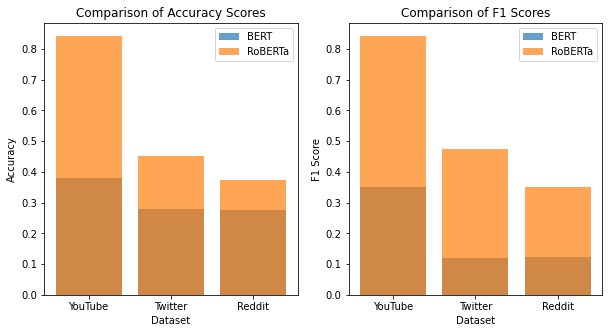

In [83]:
import matplotlib.pyplot as plt

# Define dataset names and their accuracy and F1 scores
datasets = ['YouTube', 'Twitter', 'Reddit']
accuracies_bert = [yt_acc_approach_2, twt_acc_approach_2, rd_acc_approach_2]
accuracies_roberta = [yt_acc_approach_3, twt_acc_approach_3, rd_acc_approach_3]
f1_scores_bert = [yt_f1_approach_2, twt_f1_approach_2, rd_f1_approach_2]
f1_scores_roberta = [yt_f1_approach_3, twt_f1_approach_3, rd_f1_approach_3]

# Plot the accuracy and F1 scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.bar(datasets, accuracies_bert, label='BERT', alpha=0.7)
ax1.bar(datasets, accuracies_roberta, label='RoBERTa', alpha=0.7)
ax1.set_xlabel('Dataset')
ax1.set_ylabel('Accuracy')
ax1.set_title('Comparison of Accuracy Scores')
ax1.legend()

ax2.bar(datasets, f1_scores_bert, label='BERT', alpha=0.7)
ax2.bar(datasets, f1_scores_roberta, label='RoBERTa', alpha=0.7)
ax2.set_xlabel('Dataset')
ax2.set_ylabel('F1 Score')
ax2.set_title('Comparison of F1 Scores')
ax2.legend()

plt.show()

In [84]:
from sklearn.metrics import accuracy_score, f1_score

# Create a list of dataframes
datasets = [youtube, twitter, reddit]

# Define the column names for the labels
label_cols = ['bert_label', 'roberta_label']

# Iterate over the datasets and label columns
for dataset in datasets:
    print("="*50)
    print("Evaluating dataset: ")
    display(dataset.head())
    
    # Get the true labels
    y_true = dataset['transformer_label']
    
    # Iterate over the label columns
    for label_col in label_cols:
        # Get the predicted labels
        y_pred = dataset[label_col]
        
        # Calculate the evaluation metrics
        acc = accuracy_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred, average='weighted')
        
        # Print the results
        print("="*25)
        print(f"Evaluating {label_col}")
        print(f"Accuracy: {acc:.4f}")
        print(f"F1 Score: {f1:.4f}")

Evaluating dataset: 


Comments  \
0                                                                                                                                            thank making calling   
1  hi blaire im surprised said youre spiritual dont believe god youre enlightened soul aligned truth thats rare world keep good work thank supporting jk rowling    
2                                   blaire rock thank talking issue calling celebrities left silent earth fighting pedophilia partisan issue must everybodys goal   
3                                                                                                                      kids one thing agree dont fuck kids period   
4                                                                                                 always say wretched similar priviledged comes greed lack morals   

   text_length  \
0           47   
1          258   
2          213   
3           75   
4          144   

                                                                                                                                                cleaned_comments  \
0                                                                                                                                           thank making calling   
1  hi blaire im surprised said youre spiritual dont believe god youre enlightened soul aligned truth thats rare world keep good work thank supporting jk rowling   
2                                  blaire rock thank talking issue calling celebrities left silent earth fighting pedophilia partisan issue must everybodys goal   
3                                                                                                                     kids one thing agree dont fuck kids period   
4                                                                                                always say wretched similar priviledged comes greed lack morals   

                                                                                                                                                                                    Tokens  \
0                                                                                                                                                                 [thank, making, calling]   
1  [hi, blaire, im, surprised, said, youre, spiritual, dont, believe, god, youre, enlightened, soul, aligned, truth, thats, rare, world, keep, good, work, thank, supporting, jk, rowling]   
2                                          [blaire, rock, thank, talking, issue, calling, celebrities, left, silent, earth, fighting, pedophilia, partisan, issue, must, everybodys, goal]   
3                                                                                                                                      [kids, one, thing, agree, dont, fuck, kids, period]   
4                                                                                                                [always, say, wretched, similar, priviledged, comes, greed, lack, morals]   

                                                                                                                                                                                                                                                                                                                                              POS_Tagged  \
0                                                                                                                                                                                                                                                                                                           [(thank, NN), (making, VBG), (calling, VBG)]   
1  [(hi, NN), (blaire, NN), (im, NN), (surprised, VBD), (said, VBD), (youre, NN), (spiritual, JJ), (dont, NN), (believe, VBP), (god, NN), (youre, NN), (enlightened, VBD), (soul, NN), (aligned, VBN), (truth, NN), (thats, NNS), (rare

Evaluating bert_label
Accuracy: 0.3805
F1 Score: 0.3506
Evaluating roberta_label
Accuracy: 0.8420
F1 Score: 0.8426
Evaluating dataset: 


Comments  \
0  latest podcast balenciaga run satanists think 5 httpstcoasizlxynln via youtube balenciagapedos balenciaga satan satanist satanic pedophelia podcastshow podcast podcastlife podcastandchill podcaster podcasting lucifer luciferian h   
1                                                                                              500 brands including gucci offwhite balenciaga maisonmargiela marineserre saintlaurent fashion many httpstcogrmqa9ahmx httpstco7tmoc7lxrp   
2                                                                                  good share check items im loving poshmarkapp poshmark fashion style shopmycloset balenciaga variety stevemadden httpstcoc6qmujvqsc httpstco08qcaowm2c   
3                                                                                                                           skkn nothing dont support pedos support child abuse exploitation balenciaga cancelkimkardashian cancelskims    
4                                                                                    good share check items im loving poshmarkapp poshmark fashion style shopmycloset madewell balenciaga kaileigh httpstcoh1v5xqqaeo httpstcor3oaofbei4   

   text_length  \
0          280   
1          173   
2          197   
3          160   
4          195   

                                                                                                                                                                                                      cleaned_comments  \
0  latest podcast balenciaga run satanists think 5  via youtube balenciagapedos balenciaga satan satanist satanic pedophelia podcastshow podcast podcastlife podcastandchill podcaster podcasting lucifer luciferian h   
1                                                                                                                  500 brands including gucci offwhite balenciaga maisonmargiela marineserre saintlaurent fashion many   
2                                                                                                      good share check items im loving poshmarkapp poshmark fashion style shopmycloset balenciaga variety stevemadden   
3                                                                                                          skkn nothing dont support pedos support child abuse exploitation balenciaga cancelkimkardashian cancelskims   
4                                                                                                        good share check items im loving poshmarkapp poshmark fashion style shopmycloset madewell balenciaga kaileigh   

                                                                                                                                                                                                                                        Tokens  \
0  [latest, podcast, balenciaga, run, satanists, think, 5, via, youtube, balenciagapedos, balenciaga, satan, satanist, satanic, pedophelia, podcastshow, podcast, podcastlife, podcastandchill, podcaster, podcasting, lucifer, luciferian, h]   
1                                                                                                                              [500, brands, including, gucci, offwhite, balenciaga, maisonmargiela, marineserre, saintlaurent, fashion, many]   
2                                                                                                               [good, share, check, items, im, loving, poshmarkapp, poshmark, fashion, style, shopmycloset, balenciaga, variety, stevemadden]   
3                                                                                                                     [skkn, nothing, dont, support, pedos, support, child, abuse, exploitation, balenciaga, cancelkimkardashian, cancelskims]   
4                                                                                                                 [good, share, check, items, im, loving, poshmarkapp, poshmark, fa

Evaluating bert_label
Accuracy: 0.2785
F1 Score: 0.1213
Evaluating roberta_label
Accuracy: 0.4500
F1 Score: 0.4749
Evaluating dataset: 


Comments  text_length  \
0  nice budget haulcrazy finds price           45   
1               man de budget manace           23   
2                   lekkere haul man           17   
3            oh wait way shoes taken           45   
4            nice definitely copping           23   

                    cleaned_comments                                   Tokens  \
0  nice budget haulcrazy finds price  [nice, budget, haulcrazy, finds, price]   
1               man de budget manace                [man, de, budget, manace]   
2                   lekkere haul man                     [lekkere, haul, man]   
3            oh wait way shoes taken            [oh, wait, way, shoes, taken]   
4            nice definitely copping              [nice, definitely, copping]   

                                                               POS_Tagged  \
0  [(nice, JJ), (budget, NN), (haulcrazy, NN), (finds, VBZ), (price, NN)]   
1                      [(man, NN), (de, VBZ), (budget, NN), (manace, NN)]   
2                                  [(lekkere, RB), (haul, NN), (man, NN)]   
3           [(oh, UH), (wait, JJ), (way, NN), (shoes, NNS), (taken, VBN)]   
4                          [(nice, JJ), (definitely, RB), (copping, VBG)]   

   vader_score vader_label  transformer_score transformer_label  roberta_neg  \
0       0.4215    positive           0.999222          Positive     0.064181   
1       0.0000    positive           0.917412          Negative     0.213138   
2       0.0000    positive           0.993135          Negative     0.439123   
3       0.0000    positive           0.990507          Negative     0.983405   
4       0.6705    positive           0.999805          Positive     0.000928   

   roberta_pos  bert_neg  bert_pos bert_label roberta_label  
0     0.935819  0.552438  0.447562   Negative      Positive  
1     0.786862  0.568820  0.431180   Negative      Positive  
2     0.560877  0.546224  0.453776   Negative      Positive  
3     0.016595  0.559711  0.440289   Negative      Negative  
4     0.999072  0.558140  0.441860   Negative      Positive

Evaluating bert_label
Accuracy: 0.2745
F1 Score: 0.1243
Evaluating roberta_label
Accuracy: 0.3725
F1 Score: 0.3493


In [85]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [86]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the models to use
models = ['vader', 'transformer', 'bert', 'roberta']

# Create an empty dataframe to store the results
results = pd.DataFrame(columns=['dataset', 'model', 'accuracy', 'f1_score'])

# Loop over each dataset
for dataset_name, dataset in [('YouTube', youtube), ('Twitter', twitter), ('Reddit', reddit)]:
    print(f"\nDataset: {dataset_name}")

    # Split the dataset into features and labels
    X = dataset['cleaned_comments']

    # Loop over each model and calculate the accuracy and F1 scores
    for model in models:
        y = dataset[model + '_label']

        # Check if y has more than one class
        if len(y.unique()) > 1:

            # Apply oversampling to balance the class distribution
            oversample = RandomOverSampler()
            X_resampled, y_resampled = oversample.fit_resample(X.to_frame(), y)

            y_true = y_resampled
            y_pred = y_resampled

            # Train a classifier on the resampled data
            clf = Pipeline([
                ('vect', TfidfVectorizer()),
                ('clf', MultinomialNB()),
            ])

            clf.fit(X_resampled.squeeze(), y_resampled)

            # Predict on the entire dataset
            y_pred = clf.predict(X)

        else:
            # Use original X and y for training and prediction
            y_true = y
            y_pred = y

            clf = Pipeline([
                ('vect', TfidfVectorizer()),
                ('clf', MultinomialNB()),
            ])

            clf.fit(X, y)

            y_pred = clf.predict(X)

        # Calculate accuracy and F1 score
        acc = accuracy_score(y, y_pred)
        f1 = f1_score(y, y_pred, average='weighted')

        # Add the results to the dataframe
        results = results.append({'dataset': dataset_name, 'model': model, 'accuracy': acc, 'f1_score': f1}, ignore_index=True)

# Print the results dataframe
results


Dataset: YouTube


C:\Users\sukan\AppData\Local\Temp\ipykernel_20640\929271243.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'dataset': dataset_name, 'model': model, 'accuracy': acc, 'f1_score': f1}, ignore_index=True)
C:\Users\sukan\AppData\Local\Temp\ipykernel_20640\929271243.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'dataset': dataset_name, 'model': model, 'accuracy': acc, 'f1_score': f1}, ignore_index=True)
C:\Users\sukan\AppData\Local\Temp\ipykernel_20640\929271243.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'dataset': dataset_name, 'model': model, 'accuracy': acc, 'f1_score': f1}, ignore_index=True)
C:\Users\sukan\AppData\Local\Temp\


Dataset: Twitter


C:\Users\sukan\AppData\Local\Temp\ipykernel_20640\929271243.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'dataset': dataset_name, 'model': model, 'accuracy': acc, 'f1_score': f1}, ignore_index=True)
C:\Users\sukan\AppData\Local\Temp\ipykernel_20640\929271243.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'dataset': dataset_name, 'model': model, 'accuracy': acc, 'f1_score': f1}, ignore_index=True)
C:\Users\sukan\AppData\Local\Temp\ipykernel_20640\929271243.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'dataset': dataset_name, 'model': model, 'accuracy': acc, 'f1_score': f1}, ignore_index=True)
C:\Users\sukan\AppData\Local\Temp\


Dataset: Reddit


C:\Users\sukan\AppData\Local\Temp\ipykernel_20640\929271243.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'dataset': dataset_name, 'model': model, 'accuracy': acc, 'f1_score': f1}, ignore_index=True)
C:\Users\sukan\AppData\Local\Temp\ipykernel_20640\929271243.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'dataset': dataset_name, 'model': model, 'accuracy': acc, 'f1_score': f1}, ignore_index=True)
C:\Users\sukan\AppData\Local\Temp\ipykernel_20640\929271243.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'dataset': dataset_name, 'model': model, 'accuracy': acc, 'f1_score': f1}, ignore_index=True)
C:\Users\sukan\AppData\Local\Temp\

dataset        model accuracy  f1_score
0   YouTube        vader   0.9185  0.919424
1   YouTube  transformer    0.928  0.927822
2   YouTube         bert    0.918  0.920947
3   YouTube      roberta   0.9315  0.931532
4   Twitter        vader   0.8845  0.886846
5   Twitter  transformer    0.866  0.870715
6   Twitter         bert      1.0       1.0
7   Twitter      roberta   0.9285  0.927717
8    Reddit        vader   0.9325  0.940924
9    Reddit  transformer   0.9295  0.931335
10   Reddit         bert   0.9855  0.988681
11   Reddit      roberta   0.9315  0.933835

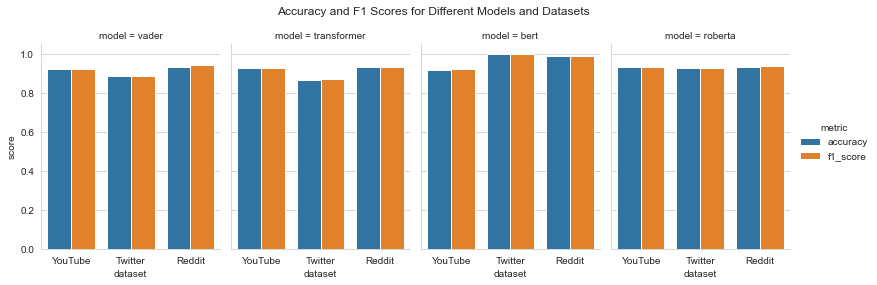

In [87]:
#Visualise the score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the results into a DataFrame
results_df = pd.DataFrame(results)

# Melt the DataFrame to create a "metric" column
results_melted = results_df.melt(id_vars=['dataset', 'model'], 
                                 value_vars=['accuracy', 'f1_score'], 
                                 var_name='metric', 
                                 value_name='score')

# Plot the results as a bar plot
sns.set_style("whitegrid")
sns.catplot(x="dataset", y="score", hue="metric", col="model", data=results_melted,
            kind="bar", height=4, aspect=.7)
plt.subplots_adjust(top=0.85)
plt.suptitle('Accuracy and F1 Scores for Different Models and Datasets')
plt.show()

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler

# Define the models to use
classification_models = [
    ('Logistic Regression', LogisticRegression()),
    ('Naive Bayes', MultinomialNB()),
    ('Random Forest', RandomForestClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Support Vector Machine', SVC())
]

# Define the datasets to use
datasets = {
    'YouTube': youtube,
    'Twitter': twitter,
    'Reddit': reddit
}

# Create an empty dataframe to store the results
model_results = pd.DataFrame(columns=['dataset', 'model', 'accuracy', 'f1_score'])

# Loop over each dataset
for dataset_name, dataset in datasets.items():
    print(f"\nDataset: {dataset_name}")

    # Split the dataset into features and labels
    X = dataset['cleaned_comments']
    y = dataset['roberta_label']

    # Apply oversampling to balance the class distribution
    oversample = RandomOverSampler()
    X_resampled, y_resampled = oversample.fit_resample(X.to_frame(), y)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

    # Vectorize the features using TF-IDF
    tfidf = TfidfVectorizer()
    X_train_tfidf = tfidf.fit_transform(X_train.squeeze())
    X_test_tfidf = tfidf.transform(X_test.squeeze())

    # Loop over each model and calculate the accuracy and F1 scores
    for model_name, model in classification_models:

        # Train the classifier on the training data
        model.fit(X_train_tfidf, y_train)

        # Predict on the test data
        y_pred = model.predict(X_test_tfidf)

        # Calculate accuracy and F1 score
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Add the results to the dataframe
        model_results = model_results.append({'dataset': dataset_name, 'model': model_name, 'accuracy': acc, 'f1_score': f1}, ignore_index=True)

# Print the results dataframe
model_results


Dataset: YouTube


C:\Users\sukan\AppData\Local\Temp\ipykernel_20640\586735805.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append({'dataset': dataset_name, 'model': model_name, 'accuracy': acc, 'f1_score': f1}, ignore_index=True)
C:\Users\sukan\AppData\Local\Temp\ipykernel_20640\586735805.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append({'dataset': dataset_name, 'model': model_name, 'accuracy': acc, 'f1_score': f1}, ignore_index=True)
C:\Users\sukan\AppData\Local\Temp\ipykernel_20640\586735805.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append({'dataset': dataset_name, 'model': model_name, 'accuracy': acc, 'f1_score': f1}, ig


Dataset: Twitter


C:\Users\sukan\AppData\Local\Temp\ipykernel_20640\586735805.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append({'dataset': dataset_name, 'model': model_name, 'accuracy': acc, 'f1_score': f1}, ignore_index=True)
C:\Users\sukan\AppData\Local\Temp\ipykernel_20640\586735805.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append({'dataset': dataset_name, 'model': model_name, 'accuracy': acc, 'f1_score': f1}, ignore_index=True)
C:\Users\sukan\AppData\Local\Temp\ipykernel_20640\586735805.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append({'dataset': dataset_name, 'model': model_name, 'accuracy': acc, 'f1_score': f1}, ig


Dataset: Reddit


C:\Users\sukan\AppData\Local\Temp\ipykernel_20640\586735805.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append({'dataset': dataset_name, 'model': model_name, 'accuracy': acc, 'f1_score': f1}, ignore_index=True)
C:\Users\sukan\AppData\Local\Temp\ipykernel_20640\586735805.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append({'dataset': dataset_name, 'model': model_name, 'accuracy': acc, 'f1_score': f1}, ignore_index=True)
C:\Users\sukan\AppData\Local\Temp\ipykernel_20640\586735805.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append({'dataset': dataset_name, 'model': model_name, 'accuracy': acc, 'f1_score': f1}, ig

dataset                   model  accuracy  f1_score
0   YouTube     Logistic Regression  0.842718  0.842363
1   YouTube             Naive Bayes  0.875728  0.875687
2   YouTube           Random Forest  0.869903  0.869584
3   YouTube           Decision Tree  0.821359  0.820732
4   YouTube  Support Vector Machine  0.895146  0.894847
5   Twitter     Logistic Regression  0.846491  0.844663
6   Twitter             Naive Bayes  0.859649  0.858114
7   Twitter           Random Forest  0.866228  0.866238
8   Twitter           Decision Tree  0.780702  0.778899
9   Twitter  Support Vector Machine  0.868421  0.867221
10   Reddit     Logistic Regression   0.87874  0.876858
11   Reddit             Naive Bayes  0.880315   0.87994
12   Reddit           Random Forest  0.905512  0.904617
13   Reddit           Decision Tree  0.930709  0.930412
14   Reddit  Support Vector Machine  0.946457  0.946356

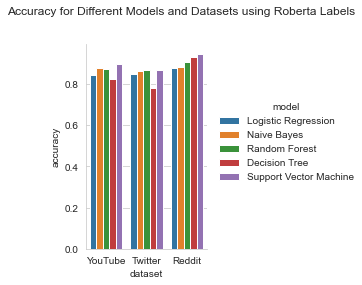

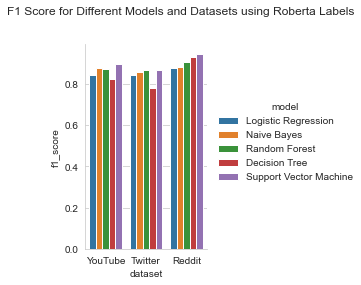

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the results into a DataFrame
results_df = pd.DataFrame(model_results)

# Plot the results as a bar plot
sns.set_style("whitegrid")
sns.catplot(x="dataset", y="accuracy", hue="model", data=results_df,
            kind="bar", height=4, aspect=.7)
plt.subplots_adjust(top=0.85)
plt.suptitle('Accuracy for Different Models and Datasets using Roberta Labels')
plt.show()

sns.catplot(x="dataset", y="f1_score", hue="model", data=results_df,
            kind="bar", height=4, aspect=.7)
plt.subplots_adjust(top=0.85)
plt.suptitle('F1 Score for Different Models and Datasets using Roberta Labels')
plt.show()